### ***Model Implementation and dumping with testing***

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model
from sklearn.neighbors import NearestNeighbors
from numpy.linalg import norm

In [3]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalMaxPooling2D()
])


In [4]:
img = image.load_img('CVDL_Assignment/images/10000.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()

result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([ 0.        ,  4.47874   ,  0.43629193, ...,  3.1709807 ,
        6.9315987 , 17.540583  ], dtype=float32)

In [5]:
import os

images_path = 'CVDL_Assignment/images'

filenames = []
for file in os.listdir(images_path):

    full_path = os.path.join(images_path, file)
    if os.path.isfile(full_path):
        filenames.append(full_path)


In [6]:
len(filenames)

44441

In [7]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [8]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([0.        , 0.01761619, 0.00171606, ..., 0.01247239, 0.02726399,
       0.0689922 ], dtype=float32)

In [9]:
image_features = []
for file in filenames[:5000]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


[array([0.        , 0.01761619, 0.00171606, ..., 0.01247239, 0.02726399,
        0.0689922 ], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747743, ..., 0.00346686, 0.03391018,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240453, 0.        , ..., 0.00170625, 0.02032886,
        0.05833261], dtype=float32),
 array([0.        , 0.10469119, 0.00198091, ..., 0.        , 0.0303377 ,
        0.02712845], dtype=float32),
 array([0.        , 0.1243846 , 0.01465611, ..., 0.00289705, 0.04055161,
        0.06534589], dtype=float32),
 array([0.        , 0.09169202, 0.01569911, ..., 0.        , 0.00503582,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545273, 0.01153318, ..., 0.0007301 , 0.04513267,
        0.07661068], dtype=float32),
 array([0.

In [10]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [11]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [12]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [13]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [14]:
np.array(Image_features).shape

(5000, 2048)

In [15]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [16]:
input_image = extract_features_from_images('CVDL_Assignment/myntradataset/images/1163.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [17]:
distance,indices = neighbors.kneighbors([input_image])

indices[0]

array([1338, 1347, 3299, 3300, 1008, 2152], dtype=int64)

In [18]:
from IPython.display import Image

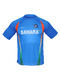

In [19]:
Image('CVDL_Assignment/myntradataset/images/1163.jpg')

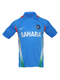

In [20]:
Image(filenames[indices[0][1]])

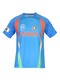

In [21]:
Image(filenames[indices[0][2]])

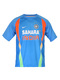

In [22]:
Image(filenames[indices[0][3]])

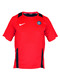

In [23]:
Image(filenames[indices[0][4]])

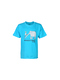

In [24]:
Image(filenames[indices[0][5]])